In [15]:
!pip install simpledbf
!pip install geopandas
from scipy.interpolate import pchip_interpolate
from google.colab import drive
from scipy.interpolate import interp2d
from simpledbf import Dbf5
import pandas as pd
import datetime
import time
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
df = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Agrimonia/Emissions/Bovini/Bovini.shp')
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%b-%Y')
df.rename(columns = {'DATE':'Date'}, inplace = True)
print(type(df))

#Calculate the density
operation = df['NUMEROCAPI']/(df['Shape_Area'])
df['NUMEROCAPI'] = operation*pow(10,6)
df = df.loc[(df['COD_REG'] == 1) | (df['COD_REG'] == 3)|(df['COD_REG'] == 4) | (df['COD_REG'] == 5) |(df['COD_REG'] == 8)]
df.rename(columns = {'NUMEROCAPI':'DENSITY',}, inplace = True)

pd.set_option('display.max_columns', None)
df.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Area,Shape_Leng,CenterX,CenterY,TYPEINT,DENSITY,NALLEVAMENT,BOVINI,BUFALINI,Date,geometry
0,1,1,1,201,201,1077,001077,Chiaverano,None,0,1.202212e+07,18164.236621,414253.041314,5.039521e+06,0,5.157161,9,62,0,2015-12-31,"POLYGON ((414358.390 5042001.044, 414381.796 5..."
1,1,1,1,201,201,1079,001079,Chiesanuova,None,0,4.118911e+06,10777.318814,394197.394664,5.030811e+06,0,66.036874,7,272,0,2015-12-31,"POLYGON ((394621.039 5031581.116, 394716.100 5..."
2,1,1,1,201,201,1089,001089,Coazze,None,0,5.657268e+07,41591.122092,360808.802237,4.990104e+06,0,1.484816,5,84,0,2015-12-31,"POLYGON ((364914.897 4993224.894, 364929.991 4..."
3,1,1,1,201,201,1006,001006,Almese,None,0,1.787564e+07,17058.439037,375721.501086,4.997294e+06,0,12.642906,21,226,0,2015-12-31,"POLYGON ((376934.962 4999073.854, 376960.555 4..."
4,1,1,1,201,201,1007,001007,Alpette,None,0,5.626076e+06,9795.562269,388609.910901,5.029096e+06,0,0.000000,0,0,0,2015-12-31,"POLYGON ((388890.737 5030465.123, 388945.987 5..."


In [18]:
df = df.loc[(df['Date'] == '2015-12-31')]
df = df.drop(['COD_RIP', 'COD_REG', 'COD_PROV', 'COD_CM','COD_UTS', 'PRO_COM', 'PRO_COM_T', 'COMUNE', 'COMUNE_A', 'CC_UTS', 'CenterX', 'CenterY', 'TYPEINT', 'NALLEVAMENT', 'BOVINI', 'BUFALINI', 'Date'], axis=1)
df.head()

,Shape_Area,Shape_Leng,DENSITY,geometry
0,1.202212e+07,18164.236621,5.157161,"POLYGON ((414358.390 5042001.044, 414381.796 5..."
1,4.118911e+06,10777.318814,66.036874,"POLYGON ((394621.039 5031581.116, 394716.100 5..."
2,5.657268e+07,41591.122092,1.484816,"POLYGON ((364914.897 4993224.894, 364929.991 4..."
3,1.787564e+07,17058.439037,12.642906,"POLYGON ((376934.962 4999073.854, 376960.555 4..."
4,5.626076e+06,9795.562269,0.000000,"POLYGON ((388890.737 5030465.123, 388945.987 5..."


In [19]:
print(df.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3862 entries, 0 to 7903
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Shape_Area  3862 non-null   float64 
 1   Shape_Leng  3862 non-null   float64 
 2   DENSITY     3862 non-null   float64 
 3   geometry    3862 non-null   geometry
dtypes: float64(3), geometry(1)
memory usage: 150.9 KB
None


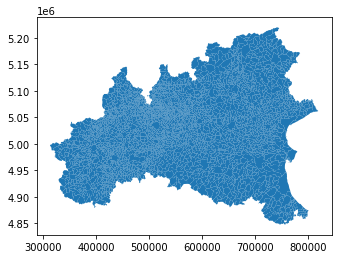

In [21]:
#df = df.loc[(df['Date'] == '2015-12-31')]
df.plot()
plt.show()